# 로지스틱 회귀(Logistic Regression) - 분류(Classification)를 위한 회귀
https://en.wikipedia.org/wiki/Logistic_regression
<br>In statistics, the **logistic model** (or logit model) is a statistical model that is usually taken to apply to a binary dependent variable. In regression analysis, **logistic regression** or **logit regression** is estimating the parameters of a logistic model. More formally, a logistic model is one where the log-odds of the probability of an event is a linear combination of independent or predictor variables. The two possible dependent variable values are often labelled as "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. The binary logistic regression model can be generalized to more than two levels of the dependent variable: categorical outputs with more than two values are modelled by multinomial logistic regression, and if the multiple categories are ordered, by ordinal logistic regression, for example the proportional odds ordinal logistic model.

https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80
<br>로지스틱 회귀(영어: logistic regression)는 D.R.Cox가 1958년에 제안한 확률 모델로서 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법이다.

로지스틱 회귀의 목적은 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것이다. 이는 독립 변수의 선형 결합으로 종속 변수를 설명한다는 관점에서는 선형 회귀 분석과 유사하다. 하지만 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.

흔히 로지스틱 회귀는 종속변수가 이항형 문제(즉, 유효한 범주의 개수가 두개인 경우)를 지칭할 때 사용된다. 이외에, 두 개 이상의 범주를 가지는 문제가 대상인 경우엔 다항 로지스틱 회귀 (multinomial logistic regression) 또는 분화 로지스틱 회귀 (polytomous logistic regression)라고 하고 복수의 범주이면서 순서가 존재하면 서수 로지스틱 회귀 (ordinal logistic regression) 라고 한다. 로지스틱 회귀 분석은 의료, 통신, 데이터마이닝과 같은 다양한 분야에서 분류 및 예측을 위한 모델로서 폭넓게 사용되고 있다.

### 1. 데이터 준비 - The Iris Dataset
iris: 붓꽃, setosa, versicolor, virginica 세 종에 대한 데이터가 있음
<br>측정 데이터: 꽃잎(petal)의 폭과 길이, 꽃받침(sepal)의 폭과 길이
<br>목표: 측정 데이터를 이용해 종을 분류하고 예측할 수 있을까?

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR) #boston['DESCR'] 도 가능
print(iris.data.shape, iris.target.shape)
print(iris.data[:5])
print(iris.target[:5])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
type(iris)

sklearn.utils.Bunch

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### 2. 데이터 살펴보기

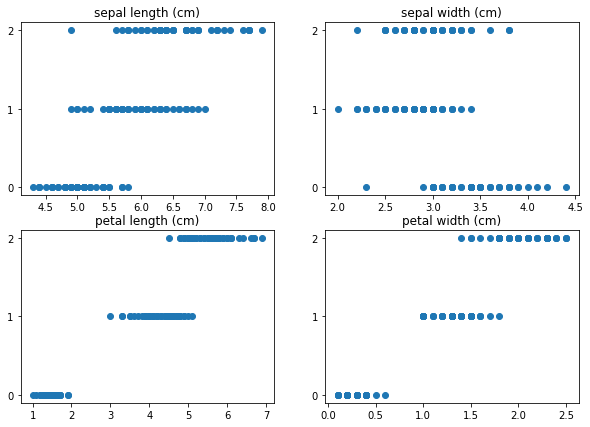

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 7)) #총 네개의 독립변수가 있으므로 2x2 타일을 이용
#y = iris.target
y = iris.target.astype('str') # target data의 type을 string으로 변환

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < iris.data.shape[1]:
        x = iris.data[:,i]

        ax.set_title(iris.feature_names[i])
        ax.scatter(x, y)
plt.show()

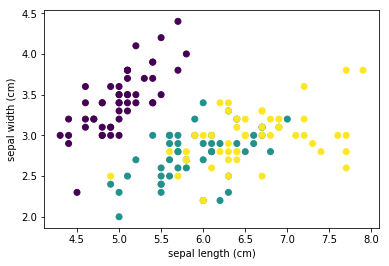

In [4]:
# Plot also the training points
#plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

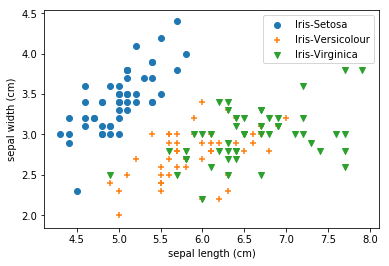

In [5]:
plt.scatter(iris.data[iris.target == 0, 0], iris.data[iris.target == 0, 1], marker='o')
plt.scatter(iris.data[iris.target == 1, 0], iris.data[iris.target == 1, 1], marker='+')
plt.scatter(iris.data[iris.target == 2, 0], iris.data[iris.target == 2, 1], marker='v')

plt.legend(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

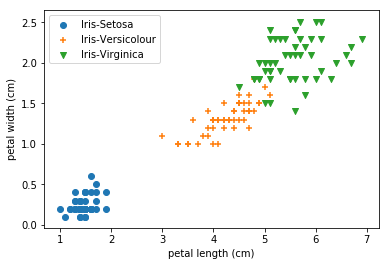

In [6]:
plt.scatter(iris.data[iris.target == 0, 2], iris.data[iris.target == 0, 3], marker='o')
plt.scatter(iris.data[iris.target == 1, 2], iris.data[iris.target == 1, 3], marker='+')
plt.scatter(iris.data[iris.target == 2, 2], iris.data[iris.target == 2, 3], marker='v')

plt.legend(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

## Logistic Regression (Scikit)

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 3. 로지스틱 회귀분석 실시

먼저 그래프에서 종의 구분에 가장 큰 영향을 미칠 것으로 예상되는 petal length로 로지스틱회귀분석을 실시

In [7]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
LR_clf.fit(X_train[:, 2].reshape(-1, 1), y_train)

C:\Users\neo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\neo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Warning에 따라 코드를 수정

In [8]:
LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto')
LR_clf.fit(X_train[:, 2].reshape(-1, 1), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
print('Train set score: {:.3f}'.format(LR_clf.score(X_train[:, 2].reshape(-1, 1), y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test[:, 2].reshape(-1, 1), y_test)))

Train set score: 0.975
Test set score: 0.867


만일 전체 데이터를 다 사용하면 결과가 좋아질까?

In [10]:
LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto')
LR_clf.fit(X_train, y_train)

C:\Users\neo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Warning에 따라 iteration 수를 늘림

In [11]:
LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
LR_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.992
Test set score: 0.867


위 결과를 놓고 보면 적어도 test set에서는 petal length 만으로도 전체 features와 동일한 결과를 냄<br>
그러나 train set에 대한 score가 높은 것을 보면 결과를 향상시킬 가능성이 있어 보임

In [13]:
print(LR_clf.predict(X_test[:20])) #예측 결과와 실제 결과 확인
print(y_test[:20])

[2 1 0 1 1 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0]
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0]


y 값으로는 품종을 알 수 없으므로 종 이름에 대한 리스트(혹은 딕셔너리도 가능)를 만들어 사용

In [14]:
labels = ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']
print([labels[p] for p in LR_clf.predict(X_test[:10])])

['Iris-Virginica', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Versicolour', 'Iris-Versicolour', 'Iris-Setosa', 'Iris-Versicolour']


### 4. 로지스틱 회귀분석 원리에 대한 이해
y의 각 값 0, 1, 2에 대해 각각 회귀분석을 실시하여 확률을 예측하고, 그 확률값이 가장 높은 것을 선택하여 분류를 결정

In [15]:
import numpy as np
np.set_printoptions(precision=3) #값이 소수점 이하 둘째자리까지만 나오도록 세팅
print('coef_', LR_clf.coef_) # 0, 1, 2 각각에 대해 네 개의 계수
print('intercept_', LR_clf.intercept_) # 0, 1, 2각각에 대한 상수

coef_ [[-0.437  0.854 -2.308 -0.993]
 [ 0.342 -0.717 -0.097 -0.899]
 [ 0.095 -0.137  2.405  1.892]]
intercept_ [  9.353   3.798 -13.151]


In [16]:
print(LR_clf.decision_function(X_test[:10])) # 0, 1, 2 각각에 대해 예측된 값
print(np.round(LR_clf.predict_proba(X_test[:10]), 3))
print('Prediction Results:', LR_clf.predict_proba(X_test[:10]).argmax(axis=1)) # 각 행 별로 가장 높은 값을 가지는 index가 예측된 분류

[[-4.225  1.554  2.671]
 [-2.323  1.711  0.613]
 [ 6.857  2.605 -9.461]
 [-2.411  1.779  0.632]
 [-2.73   1.718  1.012]
 [ 6.051  3.294 -9.345]
 [-3.817  2.113  1.704]
 [-1.776  2.203 -0.427]
 [ 6.266  2.669 -8.934]
 [-2.59   1.909  0.68 ]]
[[0.001 0.246 0.753]
 [0.013 0.74  0.247]
 [0.986 0.014 0.   ]
 [0.011 0.75  0.238]
 [0.008 0.664 0.328]
 [0.94  0.06  0.   ]
 [0.002 0.6   0.398]
 [0.017 0.917 0.066]
 [0.973 0.027 0.   ]
 [0.009 0.767 0.224]]
Prediction Results: [2 1 0 1 1 0 1 1 0 1]


**predict_proba** 은 확률의 역할을 하므로 각 행의 값을 다 합치면 1이 됨

In [17]:
proba = LR_clf.predict_proba(X_test[:10])
import numpy as np
np.sum(proba, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])